21MIS1152
Rajeev Sekar

IMPORT PACKAGES

In [112]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

LOAD DATASET

In [113]:
df = pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


DATA PREPROCESSING

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Cols 12 to 15 are of no meaning so we drop it

In [115]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

These 2 cols have unique values for most of the data so they will carry no meaning so they are dropped

In [116]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [117]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [118]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


We are encoding the catagorical data (Only the status type variale) and then scaling the whole dataset using MinMaxScaling method

In [119]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['status_type'] = le.fit_transform(df['status_type'])

ms = MinMaxScaler()
df = ms.fit_transform(df)

df

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 3.60934183e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

FINDING THE OPTIMAL K

Elbow method is used to plot the WCSS (Within cluster sum of square) vs the no of clusters which ranges from 1 t 10

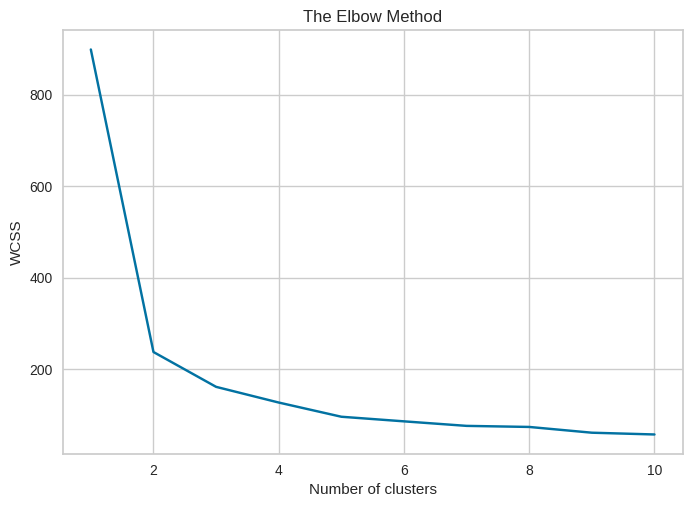

In [120]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we can see that the drop in intertia or WCSS value is very flat after k is 3 so we can go for that value

In [121]:
kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(df)

/home/ex5/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

Prnting the 3 cluster centroids

In [122]:
kmeans.cluster_centers_

array([[9.63495146e-01, 4.95849772e-02, 2.78226802e-02, 3.05676663e-02,
        4.17542514e-02, 4.92500480e-02, 8.18188168e-03, 1.01094552e-02,
        8.39139539e-03, 7.52896962e-03],
       [3.28742853e-01, 1.99588196e-02, 6.50282622e-04, 5.37894046e-04,
        1.94880247e-02, 1.93982105e-03, 2.03104006e-03, 1.16647149e-03,
        2.84240297e-03, 1.51976868e-03],
       [4.91071429e-01, 3.99261955e-01, 3.03716055e-03, 4.36954133e-03,
        3.97921722e-01, 5.17322606e-03, 9.59232614e-03, 1.23218077e-03,
        9.33706816e-04, 1.92012289e-04]])

Viewing the inertia or WCSS when k=3

In [123]:
kmeans.inertia_

161.60463573139072